In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf
if not os.path.exists("helper_functions.py"):
  !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
  print("[INFO] 'helper_functions.py' already exists, skipping download.")
from helper_functions import importTensorflow
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')
importTensorflow()

[INFO] 'helper_functions.py' already exists, skipping download.
2.13.0
Physical devices cannot be modified after being initialized
<Policy "float32">


# Intodunction to neural network classification with tensorflow

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
# Check X and y
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


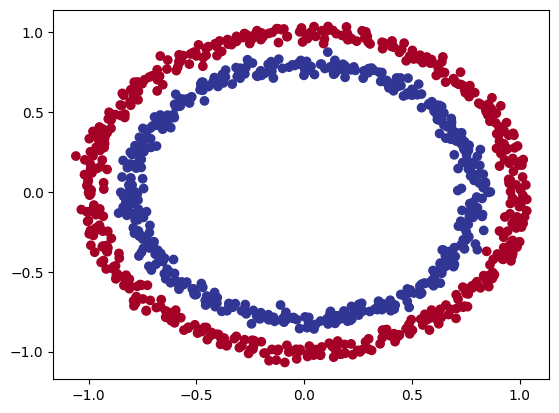

In [5]:
# Cisualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Input and Output hsapes of neural network

In [6]:
# Check shapes of features and label 
X.shape,y.shape,len(X),len(y)

((1000, 2), (1000,), 1000, 1000)

### Steps in modelling:

1. Create or import Model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak and evaluate

In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                )
#model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

In [8]:
# Train for longer
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 5.0044 - accuracy: 0.4945
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 2.8256 - accuracy: 0.4961
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7493 - accuracy: 0.4967
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7089 - accuracy: 0.4990
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.5016
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5004
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4960
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4931
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4897
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5030
Epoch 11/

In [9]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy']
                )
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 1.1410 - accuracy: 0.4968
Epoch 2/150
32/32 [==============================] - 0s 1ms/step - loss: 0.9100 - accuracy: 0.4978
Epoch 3/150
32/32 [==============================] - 0s 1ms/step - loss: 0.8321 - accuracy: 0.4985
Epoch 4/150
32/32 [==============================] - 0s 1ms/step - loss: 0.7850 - accuracy: 0.4994
Epoch 5/150
32/32 [==============================] - 0s 1ms/step - loss: 0.7535 - accuracy: 0.4981
Epoch 6/150
32/32 [==============================] - 0s 1ms/step - loss: 0.7328 - accuracy: 0.4980
Epoch 7/150
32/32 [==============================] - 0s 1ms/step - loss: 0.7180 - accuracy: 0.4977
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.4969
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4970
Epoch 10/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.5002
Epoch 11/

In [10]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )
model_3.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.3087 - accuracy: 0.5014
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.4966
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8809 - accuracy: 0.5007
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.4998
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8286 - accuracy: 0.4998
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8081 - accuracy: 0.5001
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7922 - accuracy: 0.4987
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7768 - accuracy: 0.4996
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7647 - accuracy: 0.4988
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7531 - accuracy: 0.4975
Epoch 11/

In [11]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931616067886353, 0.5]

### To visualise model predictions:
* take in the trained model, features(X) and labels(y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [12]:
import numpy as np

In [13]:
def plot_decision_boundary(model,X,y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min()- 0.1, X[:,0].max()+ 0.1
  y_min,y_max = X[:,1].min()- 0.1, X[:,1].max()+ 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  #Create X values
  x_in = np.c_[xx.ravel(),yy.ravel()] #Stack 2-D drrays together
  # Make prediction:
  y_pred = model.predict(x_in)
  #Check for multi-class
  if len(y_pred[0])>1:
    print("Doing multi-class classification\n")
    # Reshape prediction for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification\n")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 766us/step
Doing multi-class classification



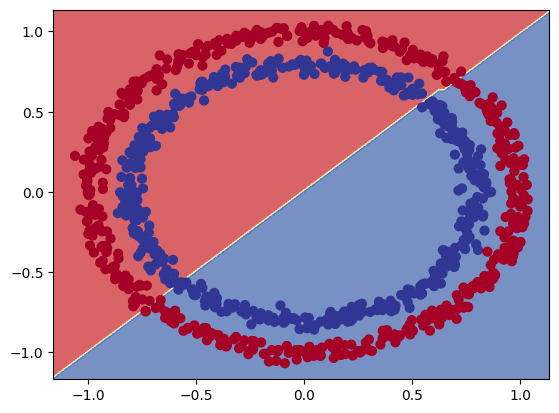

In [14]:
# CHeck out the predicitions model is making
plot_decision_boundary(model_3,X,y)

In [15]:
#lets see if this model can be used for regression model
tf.random.set_seed(42)
X_regression = tf.range(0,1000,5)
y_regression= tf.range(100,1100,5)
X_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [16]:
# Splt the data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
X_reg_train,X_reg_test,y_reg_train,y_reg_test

(<tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 78

In [17]:
# Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: -4594.8291 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

##### The above fit is wrong, need to make changes:

We compiled our model for binary classification problem
But we are working on regression data

In [18]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']
                )
model_4.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 366.6947 - mae: 366.6947
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 237.9308 - mae: 237.9308
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 113.0077 - mae: 113.0077
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 54.5137 - mae: 54.5137
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 83.9212 - mae: 83.9212
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 64.4768 - mae: 64.4768
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 43.5511 - mae: 43.5511
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 49.5408 - mae: 49.5408
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 42.2264 - mae: 42.2264
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 44.1978 - mae: 44.1978
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 2ms/step


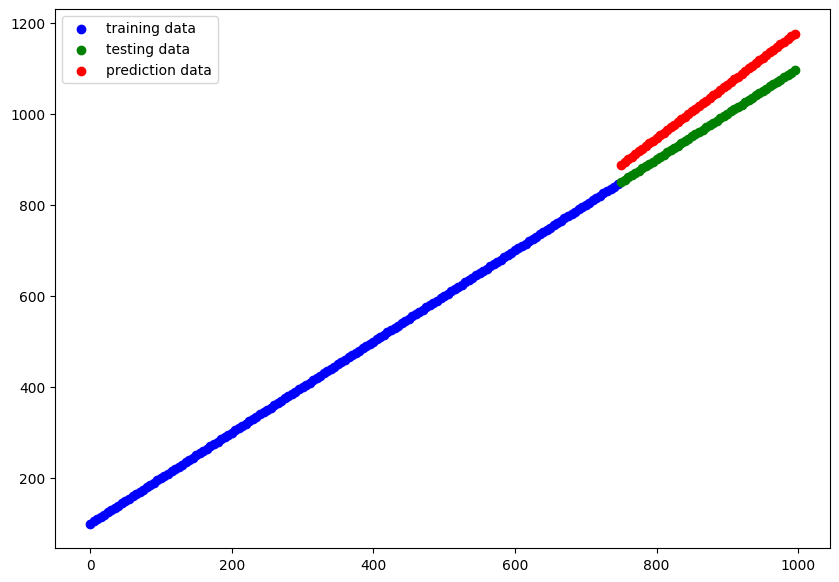

In [19]:
# Plot the regression data using prediction data
y_reg_pred = model_4.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="testing data")
plt.scatter(X_reg_test,y_reg_pred,c="r",label="prediction data")
plt.legend()

## Non-linearity : The missing piece

In [20]:
#Creating tensorflow playground for classification problem
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy']
                )
history_5 = model_5.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2908 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0858 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7971 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5195 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1122 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 2.0473 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1564 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0581 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0306 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0089 - accuracy: 0.5000
Epoch 11/

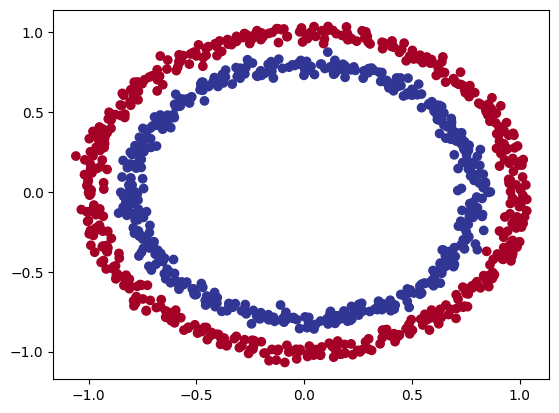

In [21]:
# Check the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 553us/step
Doing multi-class classification



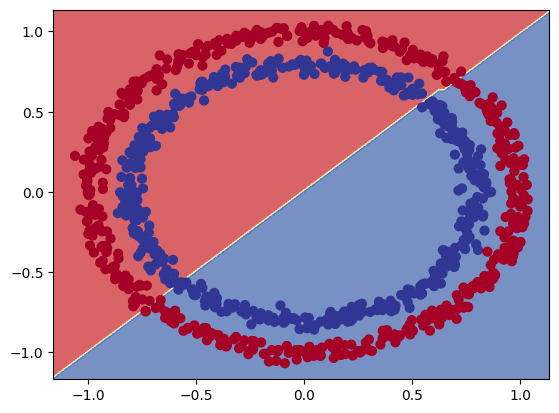

In [22]:
# check the decision coundary
plot_decision_boundary(model=model_5,X=X,y=y)

Build neural network with non-linear activation function

In [23]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy']
                )
history_6 = model_6.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.9263 - accuracy: 0.4969
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.8851 - accuracy: 0.4993
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.8901 - accuracy: 0.4987
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.8421 - accuracy: 0.4995
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7780 - accuracy: 0.4997
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7677 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7510 - accuracy: 0.4989
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.7420 - accuracy: 0.4973
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6968 - accuracy: 0.4995
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6362 - accuracy: 0.5011
Epoch 11/

#### Improving the model

In [24]:
X.shape,y.shape

((1000, 2), (1000,))

In [25]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,name="output_layer")
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.1),
                metrics=['accuracy']
                )
history_7 = model_7.fit(tf.expand_dims(X,axis=-1),y,epochs=250,verbose=0)

In [26]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5045


[0.6930981278419495, 0.5044687390327454]

313/313 [==============================] - 0s 797us/step
Doing multi-class classification



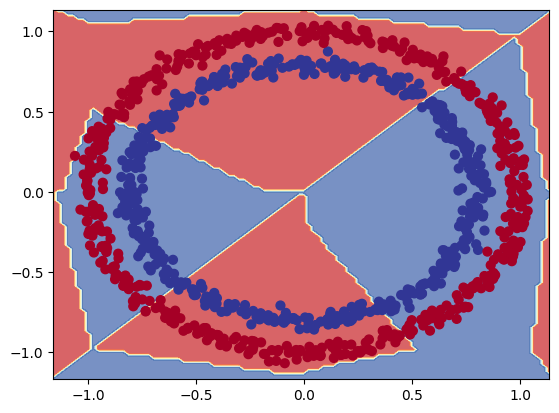

In [27]:
plot_decision_boundary(model_7,X,y)

In [28]:
tf.random.set_seed(42)

model_final = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_final.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(0.01),
                    metrics=['accuracy'])
history_final = model_final.fit(tf.squeeze(X),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6993 - accuracy: 0.5060
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5140
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5270
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5680
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.5720
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6370
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7570
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7660
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8580
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.9440
Epoch 11/

In [29]:
model_final.evaluate(X,y)

32/32 [==============================] - 0s 896us/step - loss: 0.0078 - accuracy: 0.9980


[0.007804915774613619, 0.9980000257492065]

313/313 [==============================] - 0s 543us/step
Doing binary classification



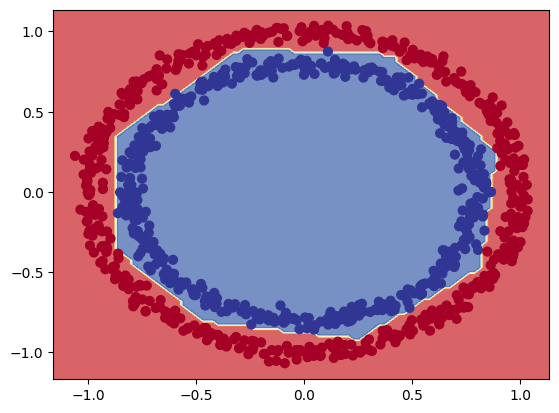

In [30]:
plot_decision_boundary(model_final,X,y)

In [31]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

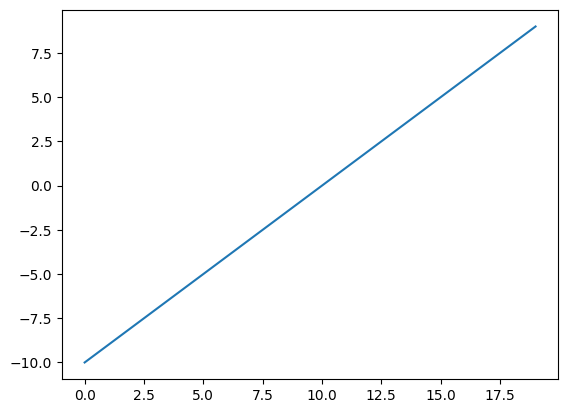

In [32]:
# Visualise tensor
plt.plot(A)

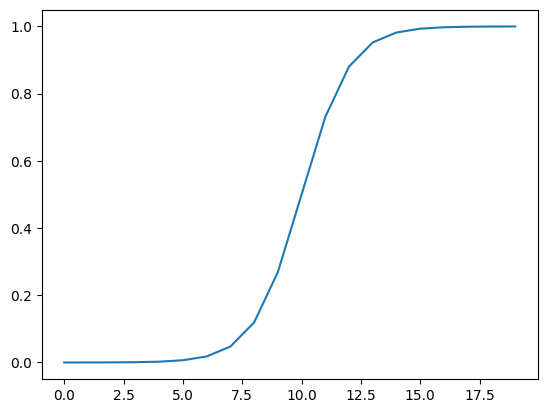

In [33]:
# Replicate sigmoid function
def sigmoid(x):
  return (1/(1+tf.exp(-x)))
plt.plot(sigmoid(A))

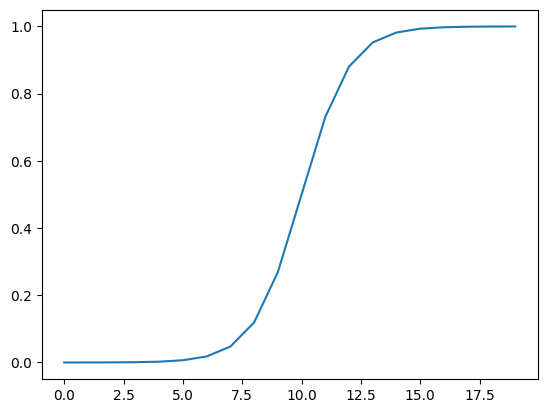

In [34]:
plt.plot(tf.keras.activations.sigmoid(A))

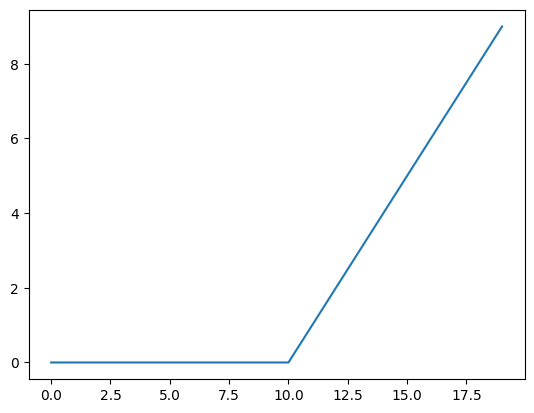

In [35]:
# Replicate RelU activation function:
def relu(x):
  return tf.maximum(0,x)
plt.plot(relu(A))

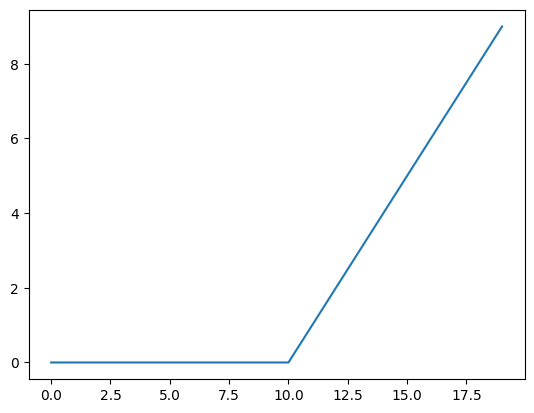

In [36]:
plt.plot(tf.keras.activations.relu(A))

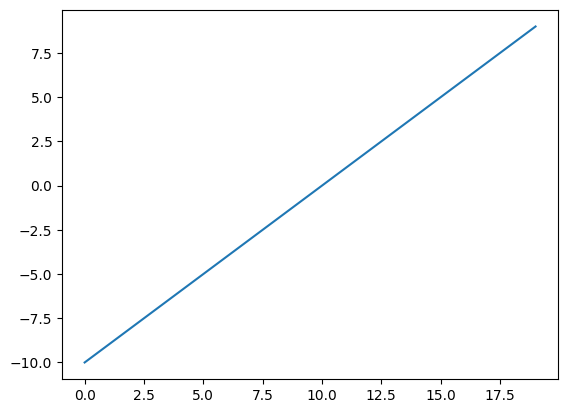

In [37]:
# Replicate linear activation function
plt.plot(tf.keras.activations.linear(A))

In [38]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and improving our classification

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        ...,
        [ 0.01574478, -1.02998534],
        [ 1.01102578,  0.16802846],
        [ 0.55778227, -0.57087612]]),
 array([[-3.75193021e-01,  6.82659723e-01],
        [ 1.53803467e-02,  9.60026022e-01],
        [-7.02783598e-01, -3.14716993e-01],
        [-2.85250150e-01,  9.66377538e-01],
        [ 4.02416825e-01, -7.43753546e-01],
        [ 6.32279332e-01, -5.71108030e-01],
        [ 8.56066985e-01,  5.49943046e-01],
        [ 1.00335945e+00,  1.90283811e-01],
        [-7.48915033e-01, -2.95112600e-01],
        [ 5.37797049e-02,  9.73883121e-01],
        [-4.70197299e-01,  7.87493733e-01],
        [-2.16863718e-01,  7.24179748e-01],
        [ 9.70258952e-01,  3.66883322e-01],
        [-5.84464292e-01, -5.74147168e-01],
        [-9.11474596e-01, -2.46308219e-01],
        [ 7.68915407e-01, -7.32492505e-02],
        [ 3.84080367e-01,  6.82994365e-01],
        [-6.83641624e

In [41]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
history=model.fit(tf.squeeze(X),y,epochs=25)

Epoch 1/25
32/32 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4980
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5110
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5150
Epoch 4/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5880
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.5720
Epoch 6/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.5700
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6150
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.6430
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6062 - accuracy: 0.6890
Epoch 10/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.7210
Epoch 11/25
32/32 [

In [42]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9850


[0.09077800810337067, 0.9850000143051147]

313/313 [==============================] - 0s 562us/step
Doing binary classification



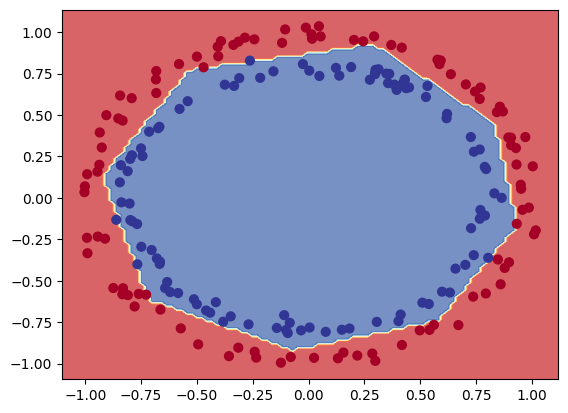

In [43]:
plot_decision_boundary(model,X_test,y_test)

313/313 [==============================] - 0s 517us/step
Doing binary classification

313/313 [==============================] - 0s 559us/step
Doing binary classification



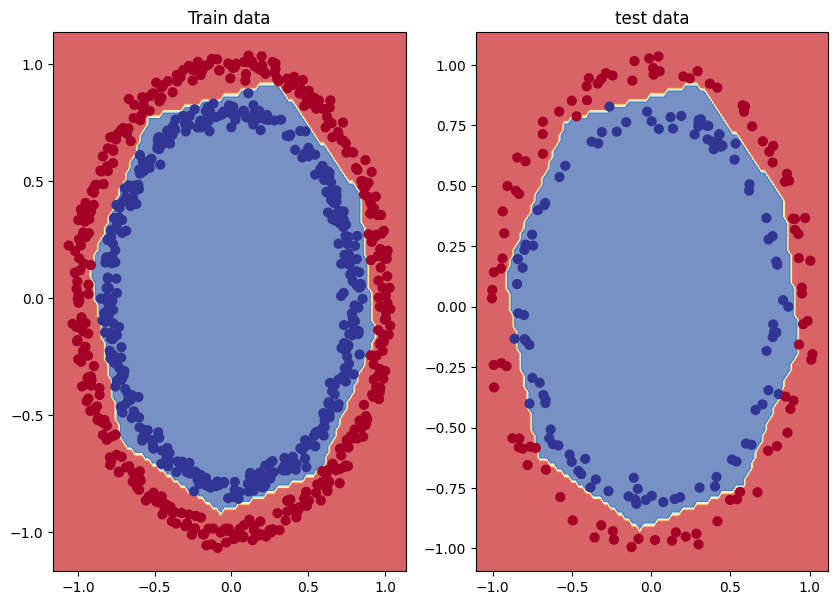

In [44]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train data")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model,X_test,y_test)
plt.show()

### Plot the loss(training) curve

In [45]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693051,0.498
1,0.689043,0.511
2,0.683353,0.515
3,0.676572,0.588
4,0.667857,0.572
5,0.660175,0.570
6,0.647707,0.615
7,0.627314,0.643
8,0.606178,0.689
9,0.571968,0.721


Text(0.5, 1.0, 'Model loss curves')

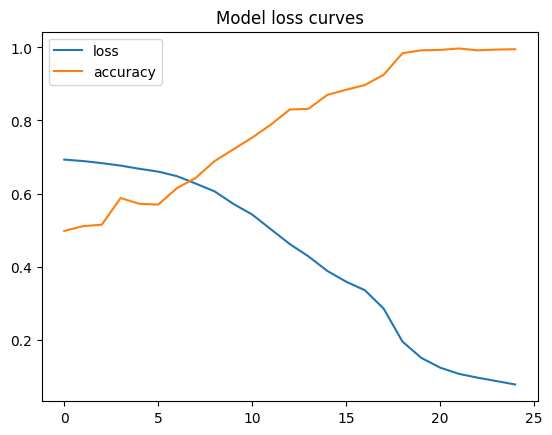

In [46]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

### Finding the ideal learning rate of the model

* Learning rate callback - functionality added to the model while its being trained


In [47]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=['accuracy'])
## Create a learning rate callback:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20)) # lr = lr0 * (drop)^(epochs/epochs_drop)

history_9 = model_9.fit(tf.squeeze(X_train),
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7220 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7212 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7204 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7195 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7186 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7176 - accuracy: 0.4875 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7165 - accuracy: 0.4775 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.4712 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<Axes: xlabel='epoch'>

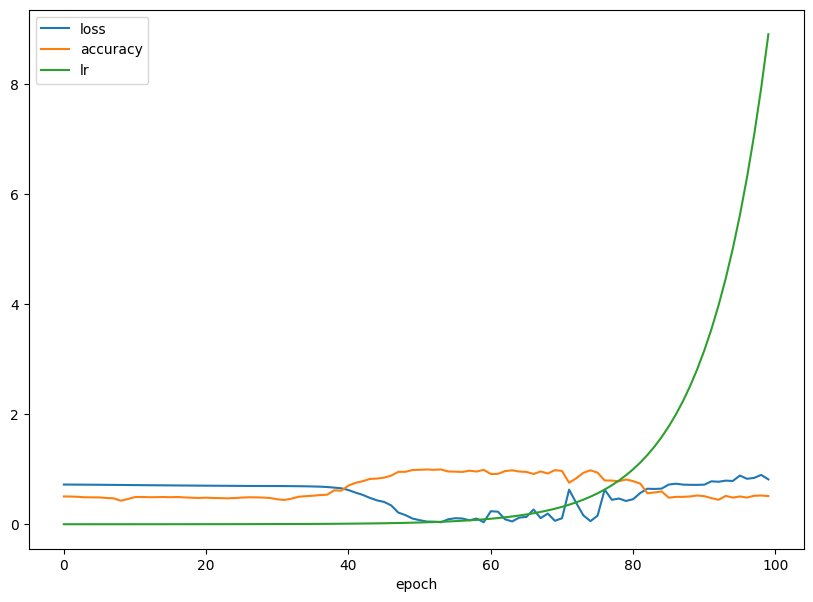

In [48]:
# Check the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel='epoch')

In [49]:
# plot the learning rate vs loss
lrs = 1e-4 * 10**(tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [50]:
len(lrs)

100

Text(0.5, 1.0, 'learning rate vs loss')

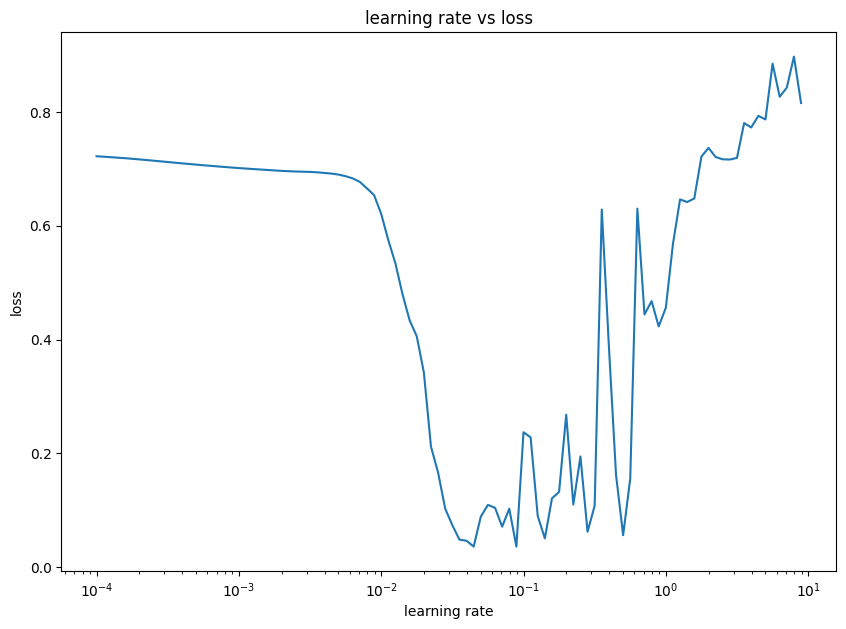

In [51]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [52]:
# higher learning rate
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.02),
                 metrics=['accuracy'])
history_10 = model_10.fit(tf.squeeze(X_train),y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.5575
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5788
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.5987
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.6675
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7513
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7962
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8537
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8687
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8813
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.8888
Epoch 11/25
25/25 [

In [53]:
lsr = 1e-4 * 10**(tf.range(25)/20)

Text(0.5, 1.0, 'learning rate vs loss')

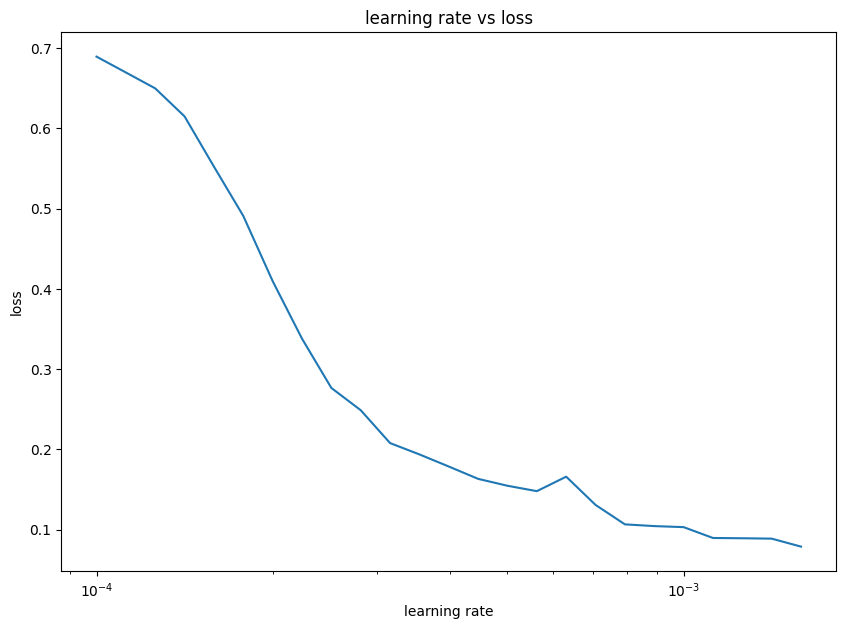

In [54]:
plt.figure(figsize=(10,7))
plt.semilogx(lsr,history_10.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [55]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9700


[0.1293974071741104, 0.9700000286102295]

In [56]:
model_8=model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9850


[0.09077800810337067, 0.9850000143051147]

313/313 [==============================] - 0s 498us/step
Doing binary classification

313/313 [==============================] - 0s 506us/step
Doing binary classification



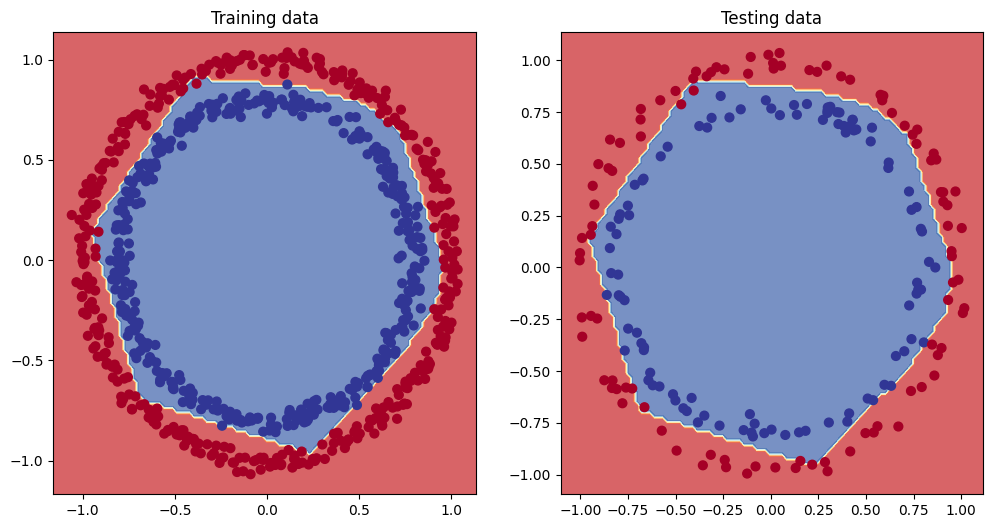

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training data")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing data")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

### More classification evaluatuin methods

* Accuracy
* Precision - focuses on fp
* Recall  - focuses on fn
* F1-score
* Confusion matrix
* Classification matrix

In [58]:
# Check the accuracy of the model
loss,accuracy = model_10.evaluate(X_test,y_test)
print("Model loss: ",loss)
print("Model accuracy: ",accuracy*100)

7/7 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9700
Model loss:  0.1293974071741104
Model accuracy:  97.00000286102295


#### Confusion matrix:

In [59]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)

confusion_matrix(y_test,tf.round(y_pred))

7/7 [==============================] - 0s 816us/step


array([[95,  5],
       [ 1, 99]])

In [60]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [61]:
y_pred[:10]

array([[0.9999838 ],
       [0.00544643],
       [0.9864347 ],
       [0.01813209],
       [0.8927351 ],
       [0.4780302 ],
       [0.19838987],
       [0.19838987],
       [0.9361818 ],
       [0.00191547]], dtype=float32)

our predictions array is in prediciton probability form, so it causes error

In [62]:
y_pred = tf.round(y_pred)

In [63]:
confusion_matrix(y_test,tf.squeeze(y_pred))

array([[95,  5],
       [ 1, 99]])

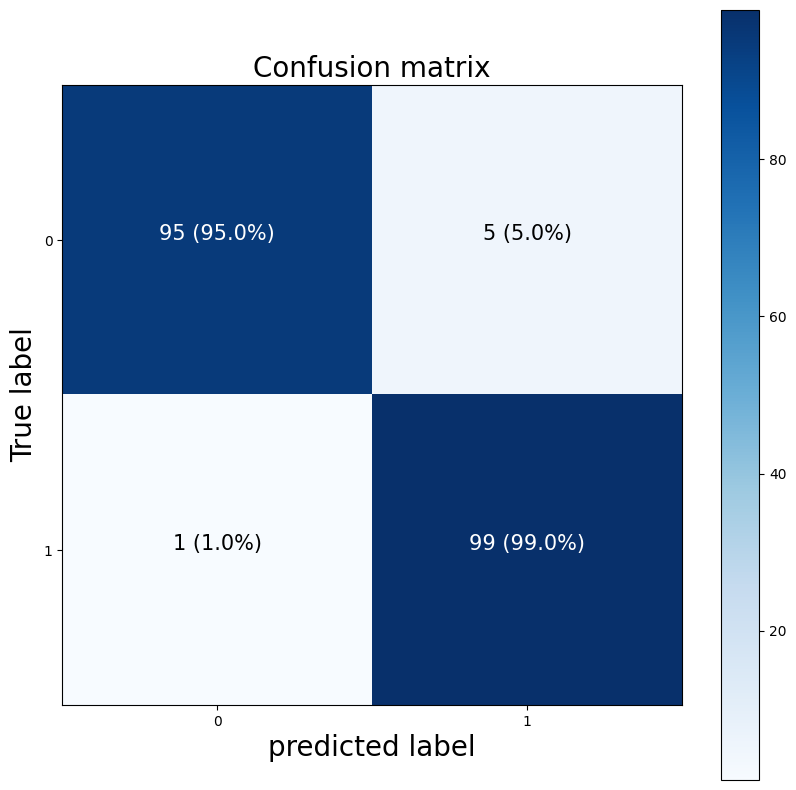

In [64]:
import itertools

figsize=(10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test,tf.squeeze(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_class = cm.shape[0]

fig,ax = plt.subplots(figsize = (10,10))

cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion matrix",
       xlabel = 'predicted label',
       ylabel = 'True label',
       xticks = np.arange(n_class),
       yticks = np.arange(n_class),
       xticklabels = labels,
       yticklabels = labels
       )

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max()+cm.min())/2

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)

### Multiclass classification problems

In [65]:
from tensorflow.keras.datasets import fashion_mnist

In [66]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [67]:
tf.shape(X_train),tf.shape(y_train),tf.shape(X_test),tf.shape(y_test)

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([60000,    28,    28], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([60000], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([10000,    28,    28], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([10000], dtype=int32)>)

In [68]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [69]:
X_train[0],y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [70]:
X_train[0].shape,y_train[0].shape

((28, 28), ())

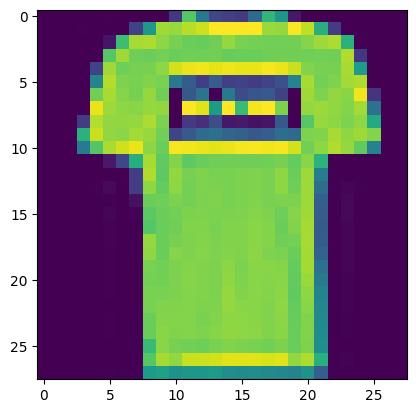

In [71]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [72]:
# Create a list to index out y labels to understand
cols = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(cols)

10

Text(0.5, 1.0, 'Trouser')

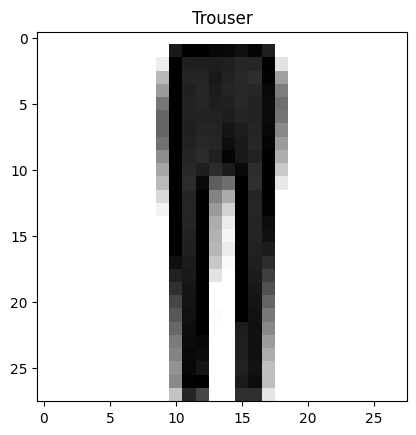

In [73]:
# Plot an img and its label
index=2100
plt.imshow(X_train[index],cmap=plt.cm.binary)
plt.title(cols[y_train[index]])

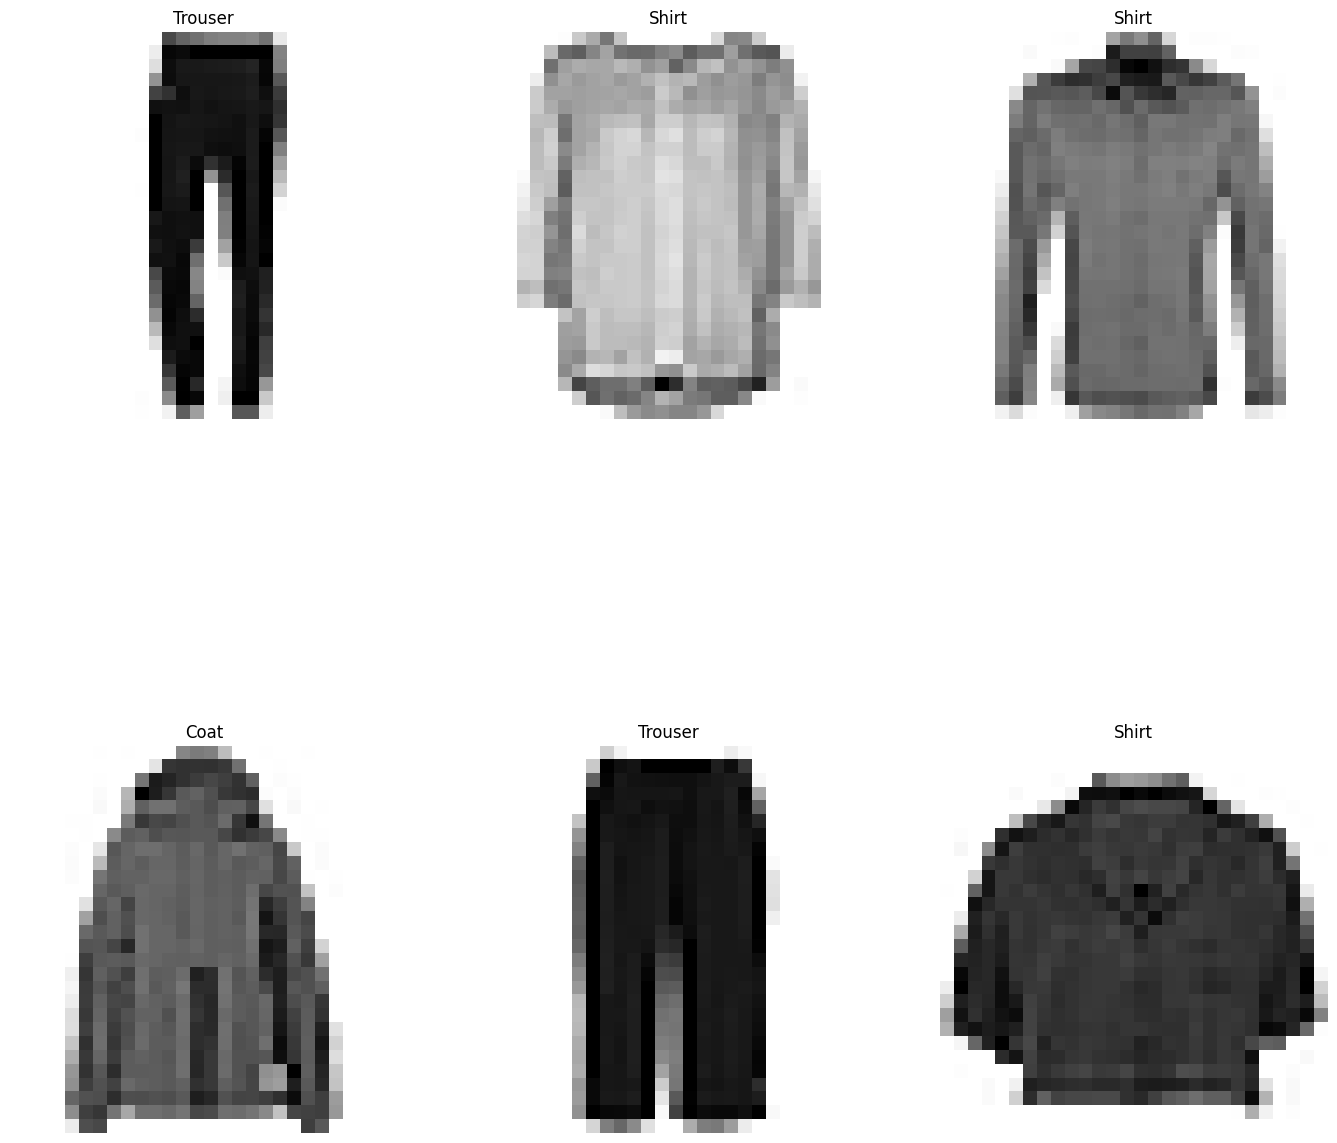

In [74]:
# plot multiple images
import random
plt.figure(figsize=(17,17))
for i in range(6):
  ax = plt.subplot(2,3,i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index],cmap=plt.cm.binary)
  plt.title(cols[y_train[rand_index]])
  plt.axis(False)

#### Building a multi-class classification model
For multi-class classification model:
* Input shape = 28x28 (the shape of each data in X_train)
* Output shape = 10 (1 per class)
* Loss = tf.keras.losses.CategoricalCrossentropy()
* Output activation = softmax

tf.keras.losses.CategoricalCrossentropy()  ---> If the data is in one_hot format


tf.keras.losses.SparseCategoricalCrossentropy() -> If the input is just integers

In [75]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
non_norm_history_11 = model_11.fit(tf.expand_dims(X_train,axis=-1),
                                   y_train,
                                   epochs=20,
                                   validation_data=(tf.expand_dims(X_test,axis=-1),y_test)
                                   )

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4765 - accuracy: 0.1047 - val_loss: 2.2585 - val_accuracy: 0.1216
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2208 - accuracy: 0.1415 - val_loss: 2.1479 - val_accuracy: 0.1611
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0077 - accuracy: 0.1992 - val_loss: 1.7894 - val_accuracy: 0.2372
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7612 - accuracy: 0.2334 - val_loss: 1.7535 - val_accuracy: 0.2406
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7025 - accuracy: 0.2572 - val_loss: 1.6625 - val_accuracy: 0.2857
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6564 - accuracy: 0.2934 - val_loss: 1.7867 - val_accuracy: 0.2927
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6185 - accuracy: 0.3162 - val_loss: 1.5904 - val_accuracy:

In [76]:
# Check summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Check the min and max values of the training data
X_train.min(),X_train.max()

(0, 255)

Neural netowrks prefer data to be scalar(or normalised)

In [78]:
# Normalize the data -> divide by max value
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()

# Check the min and max values of the training data
X_train_norm.min(),X_train_norm.max()

(0.0, 1.0)

Normalising the data helps in improving the model

In [79]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
# Fit the model
norm_history_12 = model_12.fit(tf.expand_dims(X_train_norm,axis=-1),
                               y_train,
                               epochs=20,
                               validation_data=(tf.expand_dims(X_test_norm,axis=-1),y_test))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1743 - accuracy: 0.5339 - val_loss: 0.7846 - val_accuracy: 0.7153
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6802 - accuracy: 0.7513 - val_loss: 0.6720 - val_accuracy: 0.7657
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6149 - accuracy: 0.7784 - val_loss: 0.6203 - val_accuracy: 0.7888
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5811 - accuracy: 0.7988 - val_loss: 0.6045 - val_accuracy: 0.7974
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5636 - accuracy: 0.8064 - val_loss: 0.5908 - val_accuracy: 0.7965
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5523 - accuracy: 0.8105 - val_loss: 0.5961 - val_accuracy: 0.7972
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5443 - accuracy: 0.8130 - val_loss: 0.5823 - val_accuracy:

Text(0.5, 0, 'epochs')

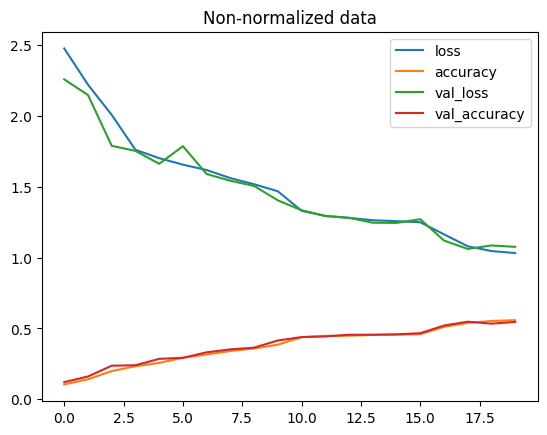

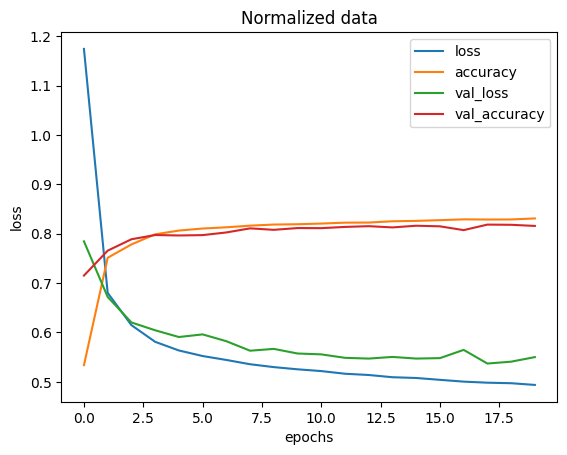

In [80]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history_11.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history_12.history).plot(title="Normalized data")
plt.ylabel("loss")
plt.xlabel("epochs")

In [81]:
# Finding the ideal learning rate

#set random seed
tf.random.set_seed(42)
# Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
# Fit the model
norm_history_13 = model_13.fit(tf.expand_dims(X_train_norm,axis=-1),
                               y_train,
                               epochs=40,
                               validation_data = (tf.expand_dims(X_test_norm,axis=-1),y_test),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6565 - accuracy: 0.3864 - val_loss: 1.1997 - val_accuracy: 0.5634 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9474 - accuracy: 0.6546 - val_loss: 0.8490 - val_accuracy: 0.6993 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7895 - accuracy: 0.7093 - val_loss: 0.7683 - val_accuracy: 0.7181 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7366 - accuracy: 0.7200 - val_loss: 0.7461 - val_accuracy: 0.7173 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7133 - accuracy: 0.7248 - val_loss: 0.7185 - val_accuracy: 0.7280 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6981 - accuracy: 0.7299 - val_loss: 0.7121 - val_accuracy: 0.7280 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'loss curve')

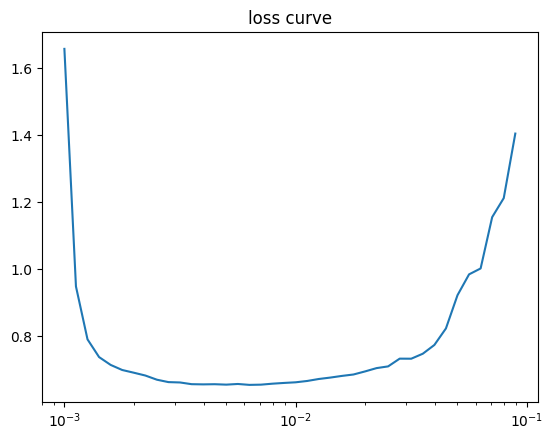

In [82]:
# Plot loss curve
import numpy as np
import matplotlib.pyplot as plt
lsr = 1e-3*10**(tf.range(40)/20)
plt.semilogx(lsr,norm_history_13.history["loss"])
plt.title("loss curve")

In [83]:
# idead model learning rate seems to be 0.001
tf.random.set_seed(42)
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax),
])
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=['accuracy'])
norm_history_14 = model_14.fit(tf.expand_dims(X_train_norm,axis=-1),
                               y_train,
                               epochs=20,
                               validation_data=(tf.expand_dims(X_test_norm,axis=-1),y_test)
                               )

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2854 - accuracy: 0.5390 - val_loss: 0.8706 - val_accuracy: 0.7309
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7703 - accuracy: 0.7484 - val_loss: 0.7499 - val_accuracy: 0.7519
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6886 - accuracy: 0.7576 - val_loss: 0.7068 - val_accuracy: 0.7399
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6540 - accuracy: 0.7628 - val_loss: 0.6738 - val_accuracy: 0.7616
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6361 - accuracy: 0.7674 - val_loss: 0.6813 - val_accuracy: 0.7620
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6238 - accuracy: 0.7698 - val_loss: 0.6621 - val_accuracy: 0.7603
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6173 - accuracy: 0.7714 - val_loss: 0.6614 - val_accuracy:

### Evaluating multi-class classification
* Evaluate its performance isong other calssification metrics(confusion matrix)
* Asses some of its predictions
* Improve its results (by training longer or changing the architecture)
* Save and import it to use in application

In [84]:
import itertools
from sklearn.metrics import confusion_matrix
figsize=(10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  #Create the confusion matrix
  cm = confusion_matrix(y_true,tf.squeeze(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_class = cm.shape[0]

  fig,ax = plt.subplots(figsize = figsize)

  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion matrix",
        xlabel = 'predicted label',
        ylabel = 'True label',
        xticks = np.arange(n_class),
        yticks = np.arange(n_class),
        xticklabels = labels,
        yticklabels = labels
        )

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max()+cm.min())/2

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)

In [85]:
cols

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [86]:
# Make predictions and plot confusion matrix
y_probs = model_14.predict(tf.expand_dims(X_test_norm,axis=-1))
y_probs[0],tf.argmax(y_probs[0])

313/313 [==============================] - 0s 618us/step


(array([4.0587707e-08, 9.6646680e-10, 1.7766154e-12, 1.4948159e-09,
        5.7548202e-15, 4.2338338e-01, 2.1356077e-10, 1.2236936e-01,
        7.3101612e-05, 4.5417413e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [87]:
# Convert all probs to integers
y_preds = tf.argmax(y_probs,axis=1)
y_preds

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [88]:
model_14.evaluate(X_test_norm,y_test)

313/313 [==============================] - 0s 845us/step - loss: 0.6294 - accuracy: 0.7742


[0.6293991208076477, 0.7742000222206116]

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test,y_pred=y_preds)

array([[748,  18,  10,  87,   4,   2, 119,   0,  12,   0],
       [  9, 932,   0,  51,   2,   0,   6,   0,   0,   0],
       [ 22,   2, 389,  27, 202,   1, 349,   0,   8,   0],
       [ 16,  25,   0, 862,  36,   1,  55,   1,   4,   0],
       [  2,   0,  92,  75, 718,   0, 107,   0,   6,   0],
       [  1,   0,   0,   2,   0, 883,   0,  60,  11,  43],
       [165,   3, 133,  88, 159,   0, 436,   0,  16,   0],
       [  0,   0,   0,   0,   0,  36,   0, 927,   0,  37],
       [  4,   1,  12,  14,   2,  11,  21,   6, 929,   0],
       [  0,   0,   0,   0,   0,  30,   0,  51,   1, 918]])

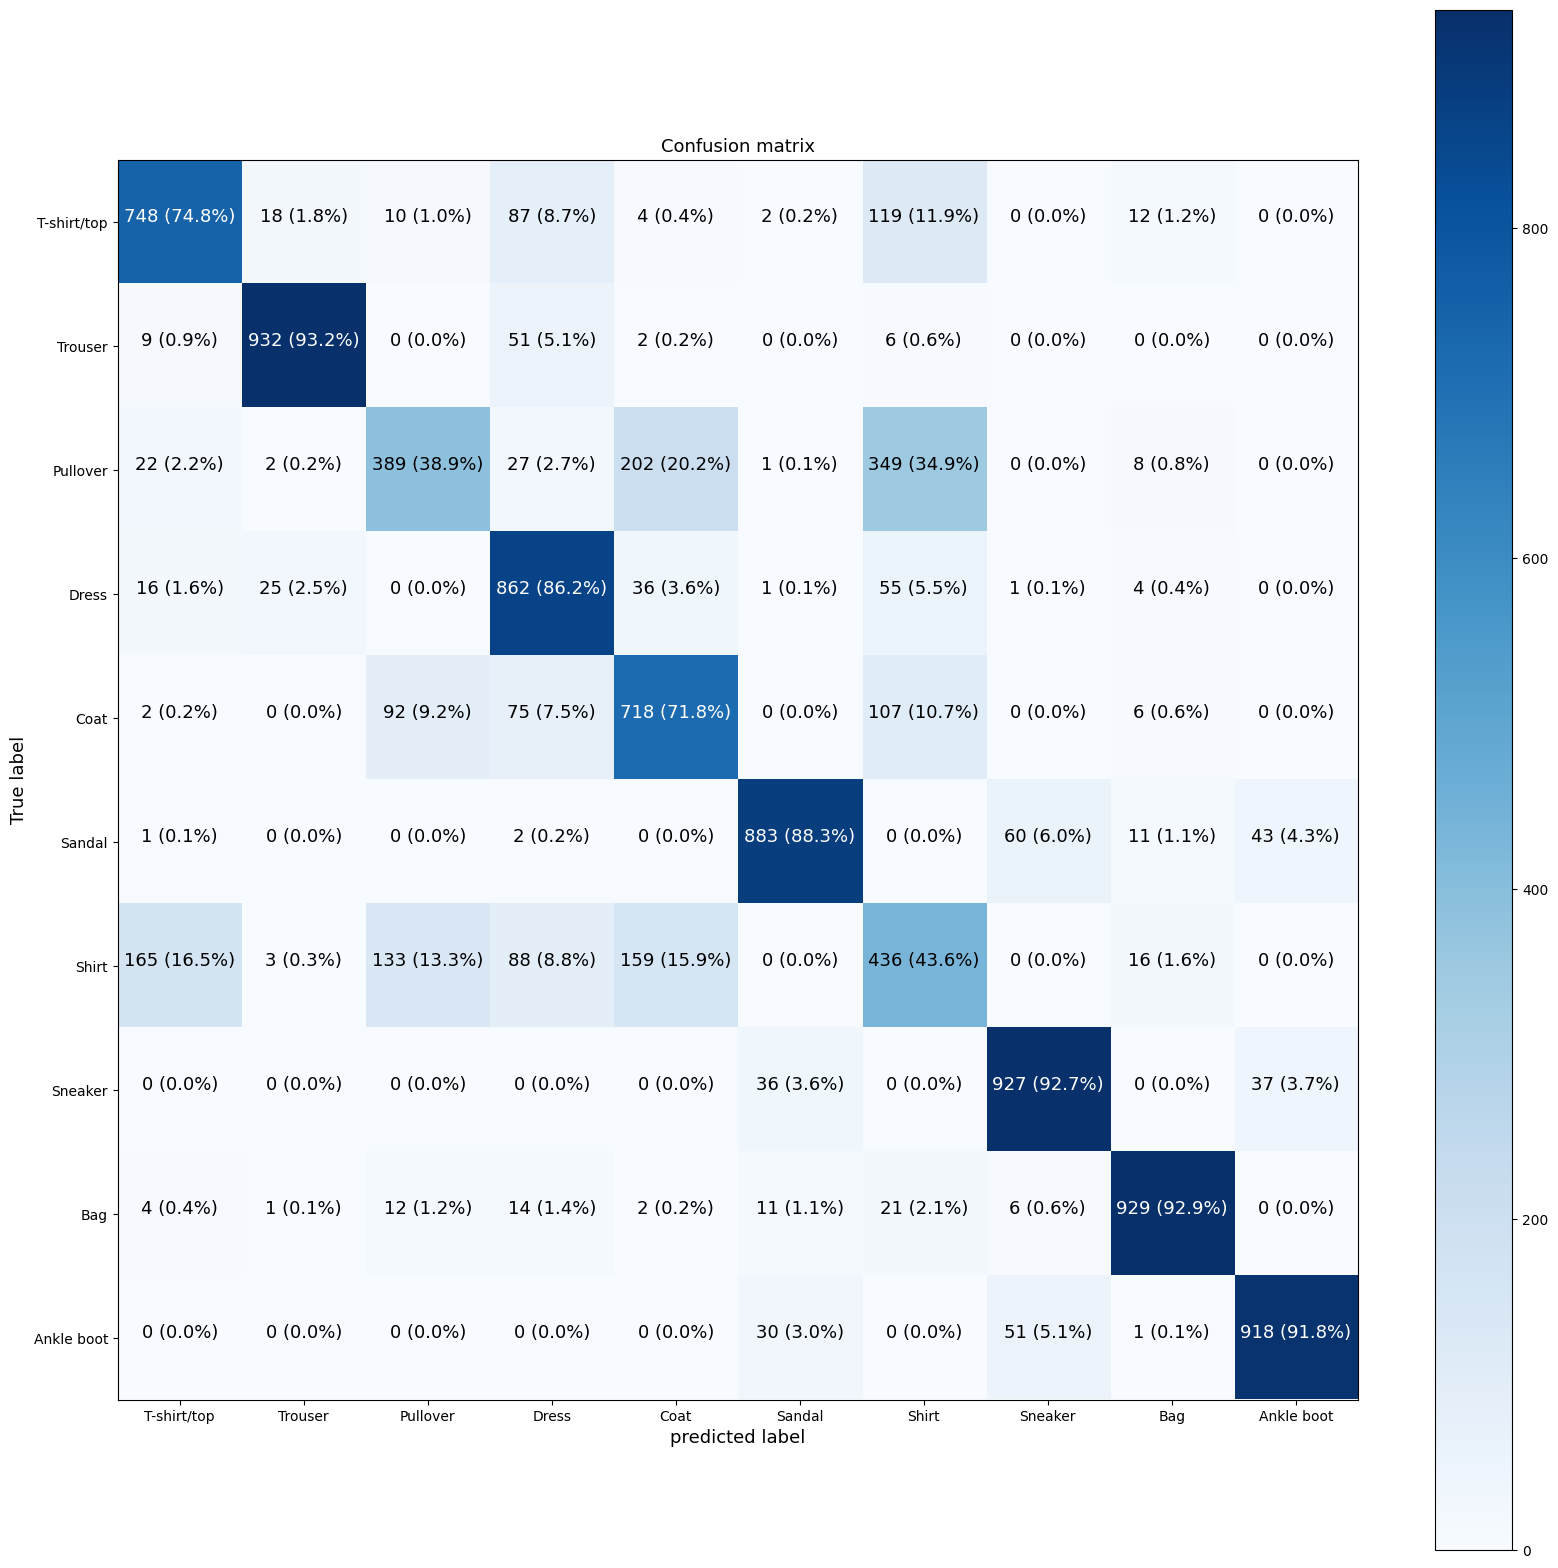

In [90]:
make_confusion_matrix(y_test,y_preds,classes=cols,text_size=13,figsize=(20,20))

In [91]:
import random

def plot_random_image(model,images,true_label,classes):
  # Picks a random image,plots it and labels it with a prediction and truth label

  #Set up random integer
  i = random.randint(0,len(images))
  
  #Create predictions and targets
  target_image = images[i];
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_label[i]]

  #plot the image
  plt.imshow(target_image,cmap = plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
                                                color=color)

1/1 [==============================] - 0s 36ms/step


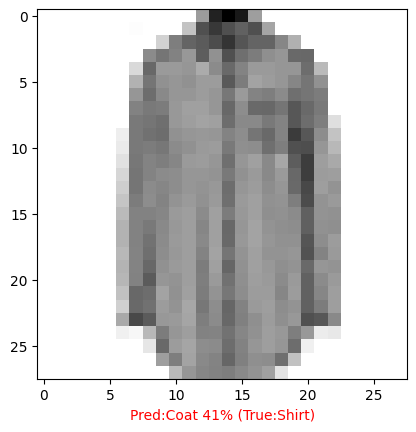

In [92]:
# Check out a random images as well as its prediction
plot_random_image(model=model_14,
                  images=X_test_norm,
                  true_label=y_test,
                  classes=cols
                  )

### What patterns is our model learning?

In [93]:
# Find the layers of our most recent model
model_14.layers

In [94]:
# Extract a particular layer
model_14.layers[1]

In [95]:
# Get the patterns of a layer in network
weights,biases = model_14.layers[1].get_weights()

# Shapes
weights,weights.shape

(array([[-7.0517588e-01,  5.3650007e-02, -6.3267225e-01,  3.7607566e-01],
        [-2.0878127e-01,  3.6445260e-04, -2.1011643e-01, -7.9064757e-01],
        [-1.4632908e+00, -1.2652956e-02,  4.9829298e-01, -2.9843268e-01],
        ...,
        [-4.9944479e-02, -3.1216418e-02, -7.0898682e-02,  1.1773705e-01],
        [ 1.7845443e-01,  8.4668621e-02, -5.0368822e-01, -1.3970198e-01],
        [-1.5111275e-01, -4.1810062e-02,  6.2736966e-02,  3.2598972e-01]],
       dtype=float32),
 (784, 4))

In [96]:
#Check out bias vector
biases,biases.shape

(array([ 1.9197431 , -0.03062491,  2.1581192 ,  2.076148  ], dtype=float32),
 (4,))

In [97]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# Another way to view 
from tensorflow.keras.utils import plot_model

plot_model(model_14,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Exercise:

In [99]:
print("hello world")

hello world


(800, 2) (200, 2) (800,) (200,)
7/7 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
[0.0018218150362372398, 1.0]


<Axes: >

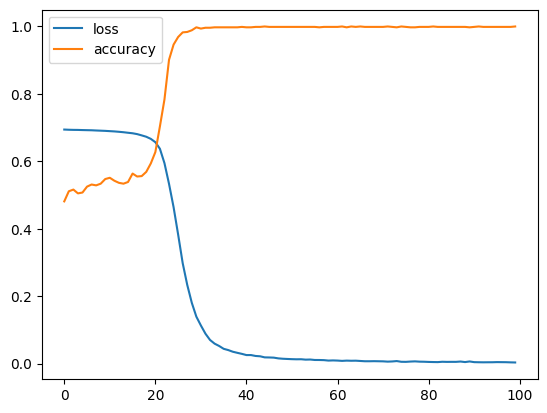

In [100]:
# 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
#Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

# Create train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#Create a model
model_ex_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_ex_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(0.001),
                   metrics=["accuracy"])
history_ex_1 = model_ex_1.fit(X_train,y_train,epochs=100,verbose=0)
print(model_ex_1.evaluate(X_test,y_test))
pd.DataFrame(history_ex_1.history).plot()

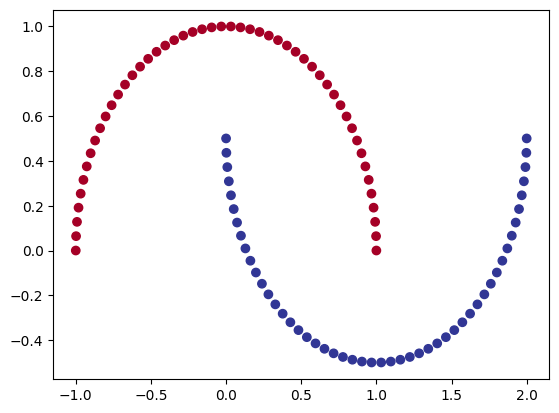

2/2 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000
[0.010082459077239037, 1.0]
2/2 [==============================] - 0s 2ms/step


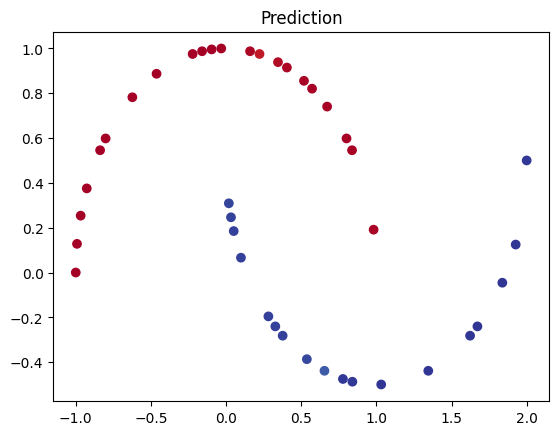

<Axes: >

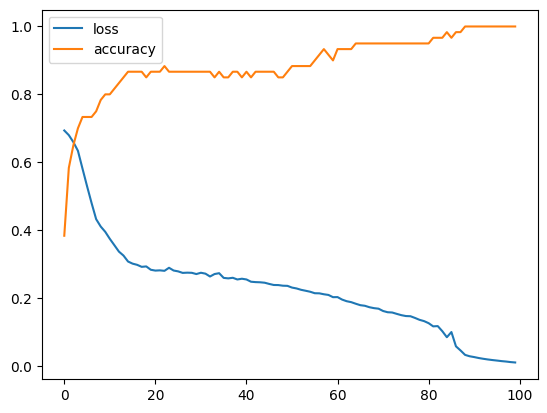

In [101]:
# 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
from sklearn.datasets import make_moons
X = make_moons()
moon = pd.DataFrame({"X0:":X[0][:,0],"X1:":X[0][:,1],"label:":X[1]}) 
plt.scatter(X[0][:,0],X[0][:,1],c=X[1],cmap=plt.cm.RdYlBu)
plt.show()
X1 = X[0]
y=X[1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.4)

model_ex_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_ex_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(0.04),
                   metrics=["accuracy"])
history_ex_2 = model_ex_2.fit(X_train,y_train,epochs=100,verbose=0)
print(model_ex_2.evaluate(X_test,y_test))
y_pred = model_ex_2.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap=plt.cm.RdYlBu)
plt.title("Prediction")
plt.show()
pd.DataFrame(history_ex_2.history).plot()

Sample Images


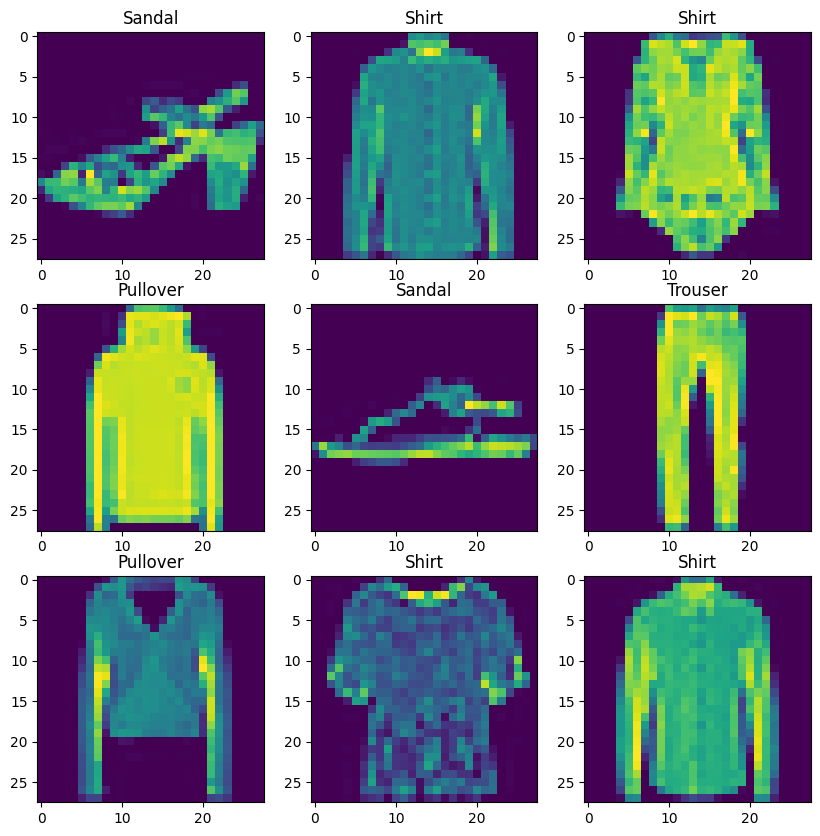

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2011 - accuracy: 0.5522 - val_loss: 0.8458 - val_accuracy: 0.7057
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7139 - accuracy: 0.7554 - val_loss: 0.6863 - val_accuracy: 0.7635
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6284 - accuracy: 0.7792 - val_loss: 0.6469 - val_accuracy: 0.7745
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6007 - accuracy: 0.7898 - val_loss: 0.6198 - val_accuracy: 0.7850
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5859 - accuracy: 0.7937 - val_loss: 0.6137 - val_accuracy: 0.7828
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5740 - accuracy: 0.7983 - val_loss: 0.6192 - val_accuracy: 0.7852
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5664 - accuracy: 0.8008 - val_loss: 0.6255 - val_accuracy:

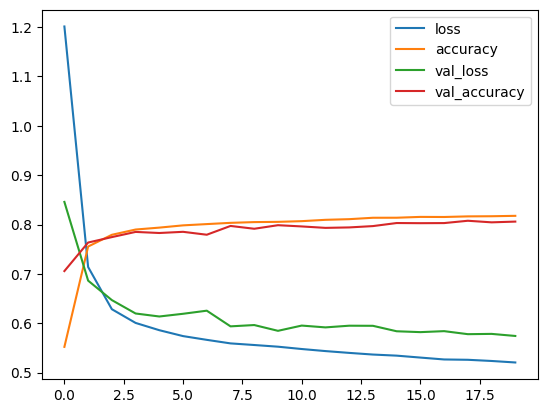

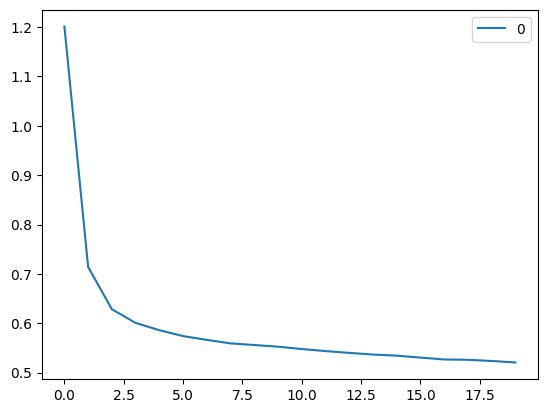

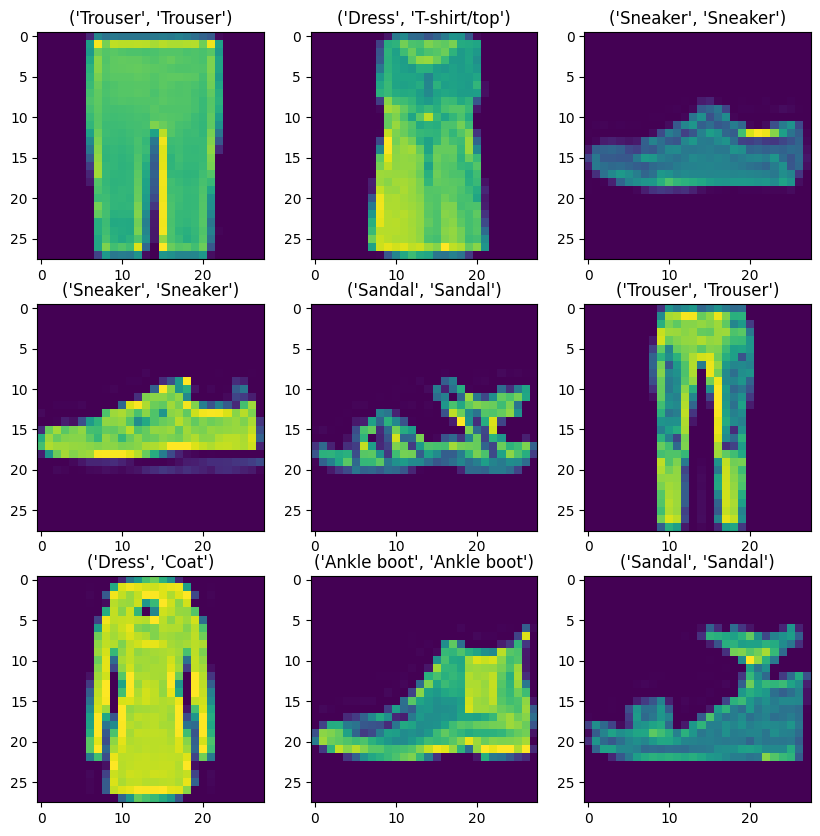

313/313 [==============================] - 0s 840us/step - loss: 0.5743 - accuracy: 0.8059
[0.574272096157074, 0.805899977684021]


In [102]:
# 4 Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time.
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
cols= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

def visualise_train_predict(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,cols=cols):
  import random
  print("Sample Images")
  plt.figure(figsize=(10,10))
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    j = random.randint(0,len(X_train))
    plt.title(cols[y_train[j]])
    plt.imshow(X_train[j])
  plt.show()
  X_train_norm = X_train/X_train.max()
  X_test_norm = X_test/X_test.max()
  model_ex_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(3,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(len(cols),activation=tf.keras.activations.softmax)
  ])
  model_ex_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(0.0016),
                     metrics=['accuracy'])
  history_ex_3 = model_ex_3.fit(X_train_norm,y_train,epochs=20,validation_data=(X_test_norm,y_test))
  pd.DataFrame(history_ex_3.history).plot()
  pd.DataFrame(history_ex_3.history["loss"]).plot()
  y_pred = model_ex_3.predict(X_test_norm)
  plt.figure(figsize=(10,10))
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    j = random.randint(0,len(X_test_norm))
    plt.imshow(X_test[j])
    plt.title((cols[y_pred[j].argmax()],cols[y_test[j]]))
  plt.show()
  print(model_ex_3.evaluate(X_test_norm,y_test))

visualise_train_predict(X_train,y_train,X_test,y_test,cols)


In [103]:
# 5 Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
test = tf.constant([[1,2,3,4],[3,4,6,7]],dtype=tf.float16)
def softmax(x):
  r=[]
  for i in range(len(test)):
    r.append(tf.exp(test[i,:])/tf.reduce_sum(tf.exp(test[i])))
  return tf.concat([r[0],r[1]],axis=0)
softmax(test),tf.reshape(tf.keras.activations.softmax(test),shape=(8,)),softmax(test)==tf.reshape(tf.keras.activations.softmax(test),shape=(8,))


(<tf.Tensor: shape=(8,), dtype=float16, numpy=
 array([0.03204, 0.08716, 0.2367 , 0.6436 , 0.01275, 0.03467, 0.256  ,
        0.6963 ], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=
 array([0.03204, 0.08716, 0.2369 , 0.644  , 0.01276, 0.03467, 0.256  ,
        0.6963 ], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True, False, False, False,  True,  True,  True])>)

In [104]:
# 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
cols= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#Normalize the data
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()

#Set random seed
tf.random.set_seed(42)
#Create a model
model_ex_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_ex_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(0.0019),
                   metrics=["accuracy"])
history_ex_4 = model_ex_4.fit(X_train_norm,y_train,epochs=20,validation_data=(X_test_norm,y_test))


Epoch 1/20
1875/1875 [==============================] - 4s 1ms/step - loss: 0.9361 - accuracy: 0.6634 - val_loss: 0.6465 - val_accuracy: 0.7751
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5978 - accuracy: 0.7881 - val_loss: 0.5862 - val_accuracy: 0.7906
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5553 - accuracy: 0.8016 - val_loss: 0.5706 - val_accuracy: 0.7965
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5323 - accuracy: 0.8123 - val_loss: 0.5586 - val_accuracy: 0.8005
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5179 - accuracy: 0.8166 - val_loss: 0.5730 - val_accuracy: 0.7980
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5070 - accuracy: 0.8208 - val_loss: 0.5450 - val_accuracy: 0.8098
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5001 - accuracy: 0.8244 - val_loss: 0.5584 - val_accuracy:

In [105]:
# 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
cols= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#Normalize the data
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()

#Set random seed
tf.random.set_seed(42)
#Create a model
model_ex_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(19,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(13,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(17,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_ex_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(0.0019),
                   metrics=["accuracy"])
history_ex_4 = model_ex_5.fit(X_train_norm,y_train,
                              epochs=20,
                              validation_data=(X_test_norm,y_test))

y_pred = model_ex_5.predict(X_test_norm)

for j in range(len(y_pred)):
  if(cols[y_pred[j].argmax()]==1):
    plt.imshow(X_test[j])
    plt.title(i)
plt.show()

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5827 - accuracy: 0.7927 - val_loss: 0.4661 - val_accuracy: 0.8372
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4257 - accuracy: 0.8450 - val_loss: 0.4834 - val_accuracy: 0.8346
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3964 - accuracy: 0.8560 - val_loss: 0.4512 - val_accuracy: 0.8341
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3803 - accuracy: 0.8618 - val_loss: 0.4308 - val_accuracy: 0.8442
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8657 - val_loss: 0.4292 - val_accuracy: 0.8459
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3588 - accuracy: 0.8688 - val_loss: 0.4271 - val_accuracy: 0.8490
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3519 - accuracy: 0.8714 - val_loss: 0.4177 - val_accuracy: